In [ ]:
# Load libraries

# Multi-Core-Processing
import time
import multiprocessing 

#Data
import os, sys
import pandas as pd

#plots
import matplotlib.pyplot as plt
import seaborn as sn

# Preprocessing & Feature Selection
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.base import TransformerMixin

# Train_test split
from sklearn.model_selection import train_test_split

# Model Development
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

# Measurements
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hyperparameter Testing
from sklearn.model_selection import GridSearchCV
import pprint
from sklearn.model_selection import RandomizedSearchCV

In [131]:
# Load Small Matrix Data
#print(os.getcwd())

path = os.getcwd()

# Load Dataset
data = pd.read_csv(path+"/Small Matrix/iphone_smallmatrix_labeled_8d.csv")

Check for NAs
iphone             0
samsunggalaxy      0
sonyxperia         0
nokialumina        0
htcphone           0
ios                0
googleandroid      0
iphonecampos       0
samsungcampos      0
sonycampos         0
nokiacampos        0
htccampos          0
iphonecamneg       0
samsungcamneg      0
sonycamneg         0
nokiacamneg        0
htccamneg          0
iphonecamunc       0
samsungcamunc      0
sonycamunc         0
nokiacamunc        0
htccamunc          0
iphonedispos       0
samsungdispos      0
sonydispos         0
nokiadispos        0
htcdispos          0
iphonedisneg       0
samsungdisneg      0
sonydisneg         0
nokiadisneg        0
htcdisneg          0
iphonedisunc       0
samsungdisunc      0
sonydisunc         0
nokiadisunc        0
htcdisunc          0
iphoneperpos       0
samsungperpos      0
sonyperpos         0
nokiaperpos        0
htcperpos          0
iphoneperneg       0
samsungperneg      0
sonyperneg         0
nokiaperneg        0
htcperneg          0

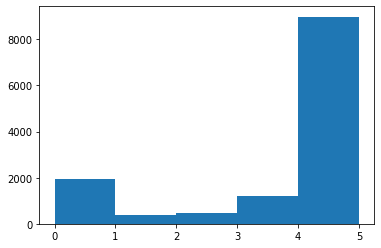

In [132]:
# Initial Data Exploration

#check for NAs
print('Check for NAs')
print(data.isna().sum())
print("\n")

# shape: no. of rows & columns of df
print('Shape of Dataframe')
print(data.shape)
print("\n")

# head: print first 20 rows
print('First 20 rows of Dataframe')
print(data.head(20))
print("\n")

# describe: statistics of the attributes
print('Statistics of the attributes')
print(data.describe())
print("\n")

# distribution
print('Distribution of Iphone sentiment')
x = data['iphonesentiment']
plt.hist(x, bins = 5)
plt.show()
print("\n")

data before
   iphone  samsunggalaxy  sonyxperia  nokialumina  htcphone  ios  \
0       1              0           0            0         0    0   
1       1              0           0            0         0    0   
2       1              0           0            0         0    0   
3       1              0           0            0         0    0   
4       1              0           0            0         0    0   
5      41              0           0            0         0    6   
6       1              0           0            0         0    0   
7       1              0           0            0         0    0   
8       1              0           0            0         0    0   
9       1              0           0            0         0    0   

   googleandroid  iphonecampos  samsungcampos  sonycampos  ...  sonyperunc  \
0              0             0              0           0  ...           0   
1              0             0              0           0  ...           0   
2    

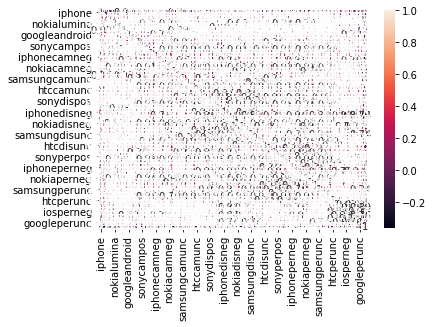



Absolut Correlation
                   iphone  samsunggalaxy  sonyxperia  nokialumina  htcphone  \
iphone           1.000000       0.019786    0.011618     0.013423  0.002731   
samsunggalaxy    0.019786       1.000000    0.366671     0.006088  0.017899   
sonyxperia       0.011618       0.366671    1.000000     0.006350  0.023682   
nokialumina      0.013423       0.006088    0.006350     1.000000  0.000673   
htcphone         0.002731       0.017899    0.023682     0.000673  1.000000   
ios              0.922060       0.044678    0.023884     0.002819  0.005002   
googleandroid    0.107530       0.236162    0.018288     0.001115  0.016498   
iphonecampos     0.078157       0.030556    0.005068     0.029824  0.006952   
samsungcampos    0.057395       0.252121    0.050140     0.009299  0.010865   
sonycampos       0.004594       0.145969    0.396751     0.002754  0.010432   
nokiacampos      0.008439       0.000400    0.004232     0.700415  0.000465   
htccampos        0.022717     

Data after removing near zero variance features
   iphone  samsunggalaxy  sonyxperia  nokialumina  htcphone  ios  \
0       1              0           0            0         0    0   
1       1              0           0            0         0    0   
2       1              0           0            0         0    0   
3       1              0           0            0         0    0   
4       1              0           0            0         0    0   
5      41              0           0            0         0    6   
6       1              0           0            0         0    0   
7       1              0           0            0         0    0   
8       1              0           0            0         0    0   
9       1              0           0            0         0    0   

   googleandroid  iphonecampos  samsungcampos  sonycampos  ...  sonyperunc  \
0              0             0              0           0  ...           0   
1              0             0              0  

C:\Users\Thomas S\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: transform() takes 2 positional arguments but 3 were given

In [135]:
# Preprocessing & Feature Selection


# DATA BEFORE
print("data before")
print(data.head(10))
print("\n")

# All X & Y Data
Xall = data.iloc[:,:-1]
Y = data.iloc[:,-1:]



# CORRELATION OF FEATURES
corrMatrix = data.corr()
print("Correlation")
print(corrMatrix)
print("\n")

#correlation heatmap of attributes
print("Correlation Heatmap")
sn.heatmap(corrMatrix, annot=True)
plt.show()
print("\n")

# dropping collinear and nearly collinear attributes
# correlation matrix in absolute values
#data_corr = data
data_corr = pd.read_csv(path+"/Small Matrix/iphone_smallmatrix_labeled_8d.csv")
corrMatrix_abs = data_corr.corr().abs()

# select upper triangle of correlation matrix
upper = corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape),k=1).astype(np.bool))

# find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > .9)]

# drop features
data_corr.drop(to_drop, axis = 1, inplace = True)

print("Absolut Correlation")
print(corrMatrix_abs)
print("\n")

# data after removing nearly collinear attributes
print("Data after removing nearly collinear features")
print(data_corr)
print("\n")

# Y after removing nearly collinear attributes
Xcoll = data_corr.iloc[:,:-1]



# REMOVING NEAR ZERO VARIANCE FEATURES
#data_nzvar = data
data_nzvar = pd.read_csv(path+"/Small Matrix/iphone_smallmatrix_labeled_8d.csv")
VarianceThreshold(0.5).fit_transform(data_nzvar)

# data after removing near zero variance features
print("Data after removing near zero variance features")
print(data_nzvar.head(10))
print("\n")

# Y after removing near zero variance features
Xnzvar = data_nzvar.iloc[:,:-1]



# recursive feature elimination
rfe = RFE(estimator = RandomForestRegressor(max_depth=2, random_state=0), n_features_to_select = 20)
# fit the model
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# fit the model
rfe.fit(X,y)

# transform the data
X, y = rfe.transform(X,y)

In [191]:
# recursive feature elimination
rfe = RFE(estimator = RandomForestRegressor(max_depth=2, random_state=0), n_features_to_select = 20)
# fit the model
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# fit the model
rfe.fit(X,y)

# transform the data
X, y = rfe.transform(X,y)

C:\Users\Thomas S\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: transform() takes 2 positional arguments but 3 were given

In [226]:
# recursive feature elimination
rfe = RFE(estimator = RandomForestRegressor(max_depth=2, random_state=0), n_features_to_select = 20)
# fit the model
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [218]:
print(X.shape, y.shape)

XVR = X.values.ravel()
yVR = y.values.ravel()

print(XVR.shape, yVR.shape)

(12973, 58) (12973, 1)
(12973, 58) (12973, 1)


In [215]:
y

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [227]:
# fit the model
rfe.fit(X,y)

C:\Users\Thomas S\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=2,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [228]:
# transform the data
X_t = rfe.transform(X)
y_t = rfe.transform(y)

ValueError: X has a different shape than during fitting.

In [136]:
# Train_test split per group of independent variable(s)
Xall_train, Xall_validation, Y_train, Y_Validation = train_test_split(Xall,Y,test_size = 0.3, random_state = 1)

Xcoll_train, Xcoll_validation, Y_train, Y_Validation = train_test_split(Xcoll,Y,test_size = 0.3, random_state = 1)

Xnzvar_train, Xnzvar_validation, Y_train, Y_Validation = train_test_split(Xnzvar,Y,test_size = 0.3, random_state = 1)

# shape of training & validation df
print(Y_train.shape), print(Y_Validation.shape)

print(Xall_train.shape), print(Xall_validation.shape)
print(Xcoll_train.shape), print(Xcoll_validation.shape)
print(Xnzvar_train.shape), print(Xnzvar_validation.shape)

(9081, 1)
(3892, 1)
(9081, 58)
(3892, 58)
(9081, 43)
(3892, 43)
(9081, 58)
(3892, 58)


(None, None)

In [158]:
# Model development Xall
models = []

#models.append(('RF', RandomForestRegressor(n_estimators = 100)))
#models.append(('KNNRG', KNeighborsRegressor(leaf_size = 2, n_neighbors=4, p = 1)))
#models.append(('SVM2', svm.SVR()))
#models.append(('RIDGE', Ridge(alpha=.5)))
#models.append(('CART', DecisionTreeRegressor()))

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=400)))
models.append(('SGD', SGDClassifier(loss = 'squared_hinge', penalty = 'l2', max_iter = 20, alpha = 0.0005)))
models.append(('RIDGE', RidgeClassifier()))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model
results = []
names = []
for name, model in models:
    print (name, model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X = Xall_train, y = Y_train.values.ravel(), cv = 10, scoring = 'accuracy', n_jobs = -1) #. values gives in an array(n,1) .ravel convert array shape to (n,) https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')
KNN: 0.761041 (0.011054)
CART DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
CART: 0.744412 (0.011189)
RF RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_l

In [148]:
# Hyperparameter Tuning Xall

# KNNRG

leaf_size = list(range(1,8))
n_neighbors = list(range(1,8))
p = [1,2]

# Convert to Dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

# Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf2 = GridSearchCV(knn_2, hyperparameters, cv = 10, n_jobs = -1)

# Fit the model
best_model = clf2.fit(Xall_train, Y_train.values.ravel())

# Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf size: 1
Best p: 1
Best n_neighbors: 5


In [190]:
# Hyperparameter Tuning Xall

# RandomForestClassifier
# Random Search

#print('Parameters currently in use:\n')
#pprint(RandomForestClassifier.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# new rf object
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation (cv = 3), 
# search across 100 different combinations (n_itet = 100), and use all available cores (n_jobes = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Xall_train, Y_train.values.ravel())

print(rf_random.best_params_)

def evaluate(model, Xall_validation, Y_Validation):
    predictions = model.predict(Xall_validation)
    errors = abs(predictions - Y_Validation)
    mape = 100 * np.mean(errors / Y_Validation)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_random = rf_random.best_estimator_
random_accuracy = eval(best_random, Xall_validation, Y_Validation)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.0min


KeyboardInterrupt: 

In [189]:
# Hyperparameter Tuning Xall

# RandomForestClassifier
# Grid Search

# Creating parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [105, 110, 120, 150],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2,3,4],
    'n_estimators': [500, 550, 600, 650, 700]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(Xall_train, Y_train.values.ravel())

#returns best hyper parameters for RF
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, Xall_validation, Y_Validation)
print(grid_accuracy)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 15.0min finished


{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 500}


NameError: name 'evaluate' is not defined

In [ ]:
# Model development Xcoll
models = []

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 2)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=400)))
models.append(('SGD', SGDClassifier(loss = 'squared_hinge', penalty = 'l2', max_iter = 20, alpha = 0.0005)))
models.append(('RIDGE', RidgeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model
results = []
names = []
for name, model in models:
    print (name, model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X = Xcoll_train, y = Y_train.values.ravel(), cv = 10, scoring = 'accuracy', n_jobs = -1) #. values gives in an array(n,1) .ravel convert array shape to (n,) https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
# Hyperparameter Tuning Xcoll

# KNNRG

leaf_size = list(range(1,8))
n_neighbors = lsit(range(1,8))
p = [1,2]

# Convert to Dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

# Create new KNN object
knn_2 = KNeighborsRegressor()

#Use GridSearch
clf2 = GridSearchCV(knn_2, hyperparameters, cv = 10, n_jobs = -1)

# Fit the model
best_model = clf2.fit(Xcoll_train, Y_train.values.ravel())

# Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# Hyperparameter Tuning Xcoll

# RandomForestClassifier
# Random Search

#print('Parameters currently in use:\n')
#print(RandomForestClassifier.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# new rf object
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation (cv = 3), 
# search across 100 different combinations (n_itet = 100), and use all available cores (n_jobes = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Xcoll_train, Y_train.values.ravel())

print(rf_random.best_params_)

In [ ]:
# Hyperparameter Tuning Xcoll

# RandomForestClassifier
# Grid Search

# Creating parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [105, 110, 120, 150],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2,3,4],
    'n_estimators': [500, 550, 600, 650, 700]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(Xcoll_train, Y_train.values.ravel())

#returns best hyper parameters for RF
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = eval(best_grid, test_features, test_labels)

In [139]:
# Model development Xnzvar_train
models = []

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 2)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=400)))
models.append(('SGD', SGDClassifier(loss = 'squared_hinge', penalty = 'l2', max_iter = 20, alpha = 0.0005)))
models.append(('RIDGE', RidgeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model
results = []
names = []
for name, model in models:
    print (name, model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X = Xnzvar_train, y = Y_train.values.ravel(), cv = 10, scoring = 'accuracy', n_jobs = -1) #. values gives in an array(n,1) .ravel convert array shape to (n,) https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RF: -1.854432 (0.143898)
KNNRG KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='uniform')
KNNRG: -2.309417 (0.351566)
SVM2 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVM2: -2.633947 (0.183116)
RIDGE Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      

In [ ]:
# Hyperparameter Tuning Xnzvar

# KNNRG

leaf_size = list(range(1,8))
n_neighbors = lsit(range(1,8))
p = [1,2]

# Convert to Dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

# Create new KNN object
knn_2 = KNeighborsRegressor()

#Use GridSearch
clf2 = GridSearchCV(knn_2, hyperparameters, cv = 10, n_jobs = -1)

# Fit the model
best_model = clf2.fit(Xnzvar_train, Y_train.values.ravel())

# Print the values of the best Hyperparameters
print('Best leaf size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# Hyperparameter Tuning Xnzvar

# RandomForestClassifier
# Random Search

#print('Parameters currently in use:\n')
#print(RandomForestClassifier.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# new rf object
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation (cv = 3), 
# search across 100 different combinations (n_itet = 100), and use all available cores (n_jobes = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Xnzvar_train, Y_train.values.ravel())

print(rf_random.best_params_)

In [ ]:
# Hyperparameter Tuning Xnzvar

# RandomForestClassifier
# Grid Search

# Creating parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [105, 110, 120, 150],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2,3,4],
    'n_estimators': [500, 550, 600, 650, 700]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(Xnzvar_train, Y_train.values.ravel())

#returns best hyper parameters for RF
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = eval(best_grid, test_features, test_labels)

In [ ]:
# Make predictions on validation dataset Xall

#choose best model
model = KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)

#apply model to all training data
model.fit(Xall_train, Y_train.values.ravel())

#make predictions of validation data with model (trained on training data)
predictions = model.predict(Xall_validation)

#Evaluate predictions

print(accuracy_score(Y_Validation, predictions))

print(confusion_matrix(Y_Validation, predictions))

print(classification_report(Y_Validation, predictions))

In [ ]:
# Make predictions on validation dataset Xcoll

#choose best model
model = KNeighborsClassifier(n_neighbors=11)

#apply model to all training data
model.fit(Xcoll_train, Y_train.values.ravel())

#make predictions of validation data with model (trained on training data)
predictions = model.predict(Xcoll_validation)

#Evaluate predictions

print(accuracy_score(Y_Validation, predictions))

print(confusion_matrix(Y_Validation, predictions))

print(classification_report(Y_Validation, predictions))

In [ ]:
# Make predictions on validation dataset Xnzvar

#choose best model
model = KNeighborsClassifier(n_neighbors=11)

#apply model to all training data
model.fit(Xnzvar_train, Y_train.values.ravel())

#make predictions of validation data with model (trained on training data)
predictions = model.predict(Xnzvar_validation)

#Evaluate predictions

print(accuracy_score(Y_Validation, predictions))

print(confusion_matrix(Y_Validation, predictions))

print(classification_report(Y_Validation, predictions))

In [ ]:
# feature engineering

# All Y data recoded
YRC = data.iloc[:,-1:].replace('0','1').replace('5','4')
#Y = data.iloc[:,-1:]
print(YRC.head(40))

#Splitt transformed data into training and testing

Xall_train, Xall_validation, YRC_train, YRC_Validation = train_test_split(Xall,YRC,test_size = 0.3, random_state = 1)


#Observe wether models improve in their accuarcy

# Model development YRC
models = []


models.append(('KNN', KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=400)))
models.append(('SGD', SGDClassifier(loss = 'squared_hinge', penalty = 'l2', max_iter = 20, alpha = 0.0005)))
models.append(('RIDGE', RidgeClassifier()))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model
results = []
names = []
for name, model in models:
    print (name, model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X = Xall_train, y = YRC_train.values.ravel(), cv = 10, scoring = 'accuracy', n_jobs = -1) #. values gives in an array(n,1) .ravel convert array shape to (n,) https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [186]:
#final model trained on all data (not train-test split) (is not yet the actual final one as not yet all of the models could be evaluated)

modelfinal = KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)

#fit model to all data (no train-test split)
modelfinal.fit(Xall, Y)


C:\Users\Thomas S\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [187]:
# apply to large dataset

# Load Large Matrix Data
#print(os.getcwd())

path = os.getcwd()

# Load Dataset
datalarge = pd.read_csv(path+"/Large Matrix/Large Matrix Giammarco.csv")

# All X & Y Data (Large Matrix)
XallLarge = datalarge.iloc[:,:-1]
YLarge = datalarge.iloc[:,-1:]

YLarge = modelfinal.predict(XallLarge)


array([0, 0, 5, ..., 0, 0, 0], dtype=int64)